In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns # for making plots with seaborn
color = sns.color_palette()
import sklearn.metrics as metrics

import warnings
warnings.filterwarnings("ignore")

In [2]:
stock_prices = pd.read_csv('Market_Risk_Data_coded.csv')

#Glimpse of Data
stock_prices.head()

,Date,ITC Limited,Bharti Airtel,Tata Motors,DLF Limited,Yes Bank
0,28-03-2016,217,316,386,114,173
1,04-04-2016,218,302,386,121,171
2,11-04-2016,215,308,374,120,171
3,18-04-2016,223,320,408,122,172
4,25-04-2016,214,319,418,122,175


In [3]:
stock_prices.columns = stock_prices.columns.str.replace(' ', '_').str.replace('.', '')

In [4]:
stock_prices.head()

,Date,ITC_Limited,Bharti_Airtel,Tata_Motors,DLF_Limited,Yes_Bank
0,28-03-2016,217,316,386,114,173
1,04-04-2016,218,302,386,121,171
2,11-04-2016,215,308,374,120,171
3,18-04-2016,223,320,408,122,172
4,25-04-2016,214,319,418,122,175


In [5]:
print('The number of rows (observations) is',stock_prices.shape[0],'\n''The number of columns (variables) is',stock_prices.shape[1])

The number of rows (observations) is 418 
The number of columns (variables) is 6


In [6]:
stock_prices.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Date           418 non-null    object
 1   ITC_Limited    418 non-null    int64 
 2   Bharti_Airtel  418 non-null    int64 
 3   Tata_Motors    418 non-null    int64 
 4   DLF_Limited    418 non-null    int64 
 5   Yes_Bank       418 non-null    int64 
dtypes: int64(5), object(1)
memory usage: 19.7+ KB


In [7]:
stock_prices.describe()

,ITC_Limited,Bharti_Airtel,Tata_Motors,DLF_Limited,Yes_Bank
count,418.000000,418.000000,418.000000,418.000000,418.000000
mean,278.964115,528.260766,368.617225,276.827751,124.442584
std,75.114405,226.507879,182.024419,156.280781,130.090884
min,156.000000,261.000000,65.000000,110.000000,11.000000
25%,224.250000,334.000000,186.000000,166.250000,16.000000
50%,265.500000,478.000000,399.500000,213.000000,30.000000
75%,304.000000,706.750000,466.000000,360.500000,249.750000
max,493.000000,1236.000000,1035.000000,928.000000,397.000000


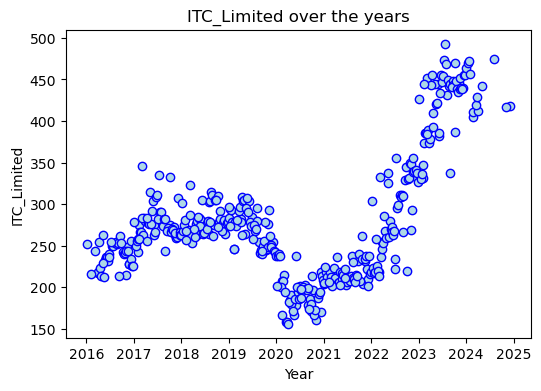

In [8]:
plt.figure(figsize = (6, 4))
stock_prices['dates'] = [pd.to_datetime(d) for d in stock_prices['Date']]
plt.scatter(stock_prices['dates'], stock_prices['ITC_Limited'], edgecolors='b', color = 'lightblue')
plt.xlabel('Year')
plt.ylabel('ITC_Limited')
plt.title('ITC_Limited over the years')
plt.show()

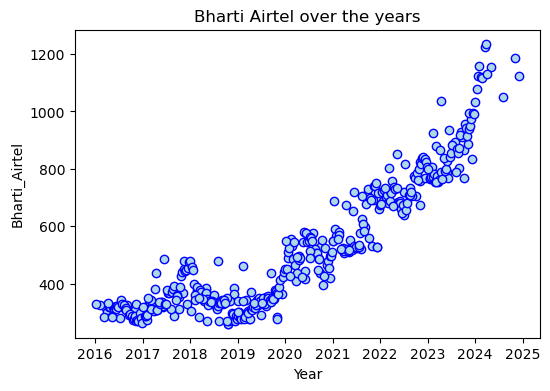

In [9]:
plt.figure(figsize = (6, 4))
stock_prices['dates'] = [pd.to_datetime(d) for d in stock_prices['Date']]
plt.scatter(stock_prices['dates'], stock_prices['Bharti_Airtel'], edgecolors='b', color = 'lightblue')
plt.xlabel('Year')
plt.ylabel('Bharti_Airtel')
plt.title('Bharti Airtel over the years')
plt.show()

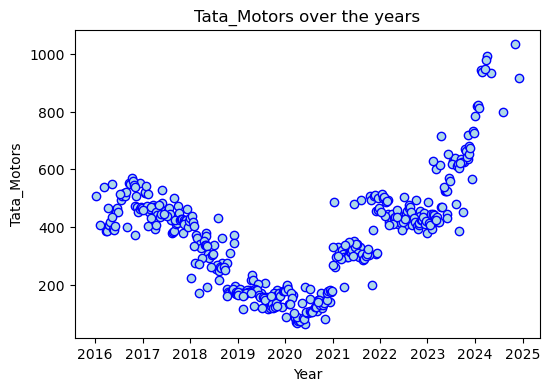

In [10]:
plt.figure(figsize = (6, 4))
stock_prices['dates'] = [pd.to_datetime(d) for d in stock_prices['Date']]
plt.scatter(stock_prices['dates'], stock_prices['Tata_Motors'], edgecolors='b', color = 'lightblue')
plt.xlabel('Year')
plt.ylabel('Tata_Motors')
plt.title('Tata_Motors over the years')
plt.show()

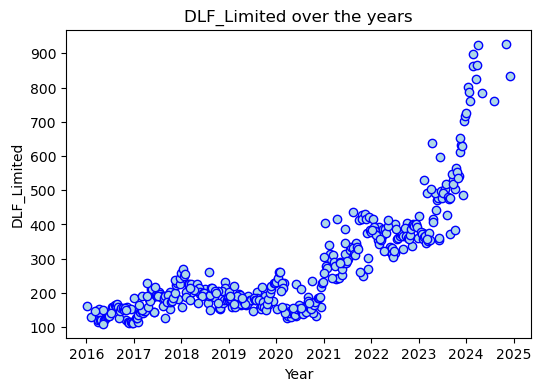

In [11]:
plt.figure(figsize = (6, 4))
stock_prices['dates'] = [pd.to_datetime(d) for d in stock_prices['Date']]
plt.scatter(stock_prices['dates'], stock_prices['DLF_Limited'], edgecolors='b', color = 'lightblue')
plt.xlabel('Year')
plt.ylabel('DLF_Limited')
plt.title('DLF_Limited over the years')
plt.show()

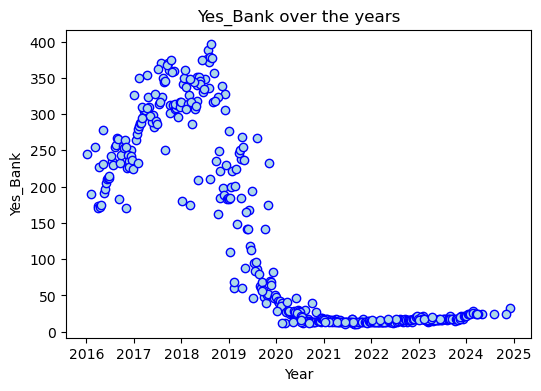

In [12]:
plt.figure(figsize = (6, 4))
stock_prices['dates'] = [pd.to_datetime(d) for d in stock_prices['Date']]
plt.scatter(stock_prices['dates'], stock_prices['Yes_Bank'], edgecolors='b', color = 'lightblue')
plt.xlabel('Year')
plt.ylabel('Yes_Bank')
plt.title('Yes_Bank over the years')
plt.show()

In [13]:
stock_returns = np.log(stock_prices.drop(['Date','dates'],axis=1)).diff(axis = 0, periods = 1) 

In [14]:
stock_returns.head()

,ITC_Limited,Bharti_Airtel,Tata_Motors,DLF_Limited,Yes_Bank
0,NaN,NaN,NaN,NaN,NaN
1,0.004598,-0.045315,0.000000,0.059592,-0.011628
2,-0.013857,0.019673,-0.031582,-0.008299,0.000000
3,0.036534,0.038221,0.087011,0.016529,0.005831
4,-0.041196,-0.003130,0.024214,0.000000,0.017291


In [15]:
stock_means = stock_returns.mean(axis = 0)
stock_means

ITC_Limited      0.001634
Bharti_Airtel    0.003271
Tata_Motors      0.002234
DLF_Limited      0.004863
Yes_Bank        -0.004737
dtype: float64

In [16]:
stock_sd = stock_returns.std(axis = 0)
stock_sd

ITC_Limited      0.035904
Bharti_Airtel    0.038728
Tata_Motors      0.060484
DLF_Limited      0.057785
Yes_Bank         0.093879
dtype: float64

In [20]:
df = pd.DataFrame({'Average':stock_means, 'Volatility': stock_sd})

from tabulate import tabulate
print(tabulate(df, headers='keys', tablefmt='psql'))

+---------------+-------------+--------------+
|               |     Average |   Volatility |
|---------------+-------------+--------------|
| ITC_Limited   |  0.00163444 |    0.0359038 |
| Bharti_Airtel |  0.00327073 |    0.0387279 |
| Tata_Motors   |  0.00223433 |    0.0604845 |
| DLF_Limited   |  0.00486256 |    0.0577847 |
| Yes_Bank      | -0.00473678 |    0.0938788 |
+---------------+-------------+--------------+


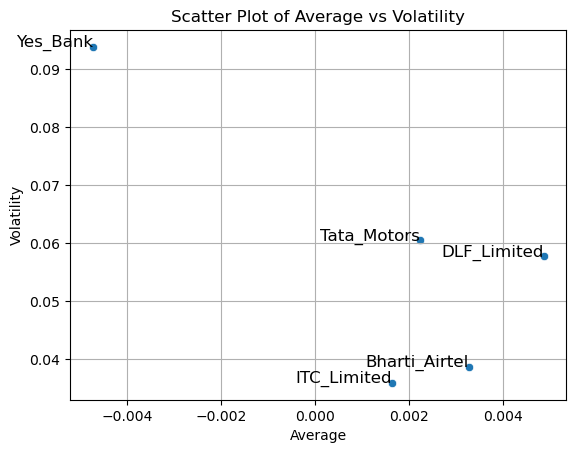

In [27]:
plot = sns.scatterplot(df,x="Average",y= "Volatility")

# Add labels for each point
for i in range(df.shape[0]):
    plt.text(df['Average'][i], df['Volatility'][i], df.index[i], fontsize=12, ha='right')

# Add title and labels
plt.title('Scatter Plot of Average vs Volatility')
plt.xlabel('Average')
plt.ylabel('Volatility')
plt.grid(True)

# Show plot
plt.show()
plt.show()